# NLP Problem

# Importing the Libraries

In [136]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Importing the Dataset

In [0]:
dataset = pd.read_csv('V1.4_Training.csv',header=None)
dataset=dataset.drop(0,axis=1)

# Cleaning the texts and Making Bag Of words

In [0]:
corpus = []
for i in range(0, 8500):
    review = re.sub('[^a-zA-Z]', ' ', dataset[1][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1800)

X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

# Visualizing The Dataset

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



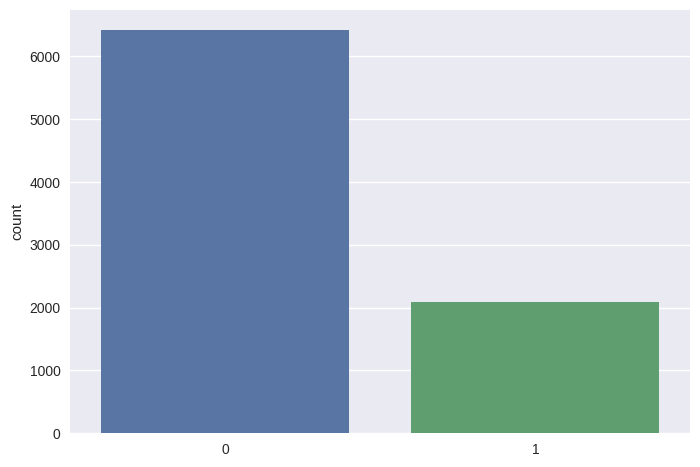

In [139]:
sns.countplot(x=y)

We can see That the Dataset is dominated by 0's so it is necessary to make a split using stratify.
Moreover their is no missing value so we can proceed with out task of Predicting whether the given statement is a review or not.

# Splitting The Dataset

In [0]:
# Splitting the dataset into the Training set and Test set
#You can use sklear.model_selection or sklearn.cross_validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5,stratify=y)

# Feature Scaling required in Random Forest

In [141]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



# Fitting Random Forest Classifier

In [0]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Checking Accuracy and Confusion Matrix

In [143]:
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy of Model is: ", ac*100)
print("The Confusion Matrix is: ",cm)

Accuracy of Model is:  81.88235294117648
The Confusion Matrix is:  [[1841   83]
 [ 379  247]]


# Reading The Test Data

In [0]:
df = pd.read_csv('SubtaskA_EvaluationData.csv',header=None)
df_test=df.drop([0,2],axis=1)

In [0]:
#Filtering The test Data 
corpus = []
for i in range(0, df_test.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', df_test[1][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1800)
X = cv.fit_transform(corpus).toarray()

In [146]:
X_eval=sc.transform(X)
y_pred_eval = classifier.predict(X_eval)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [0]:
df[2]=y_pred_eval      #Replacing all The X with predicted Values

In [0]:
df.to_csv('Ankit_Singh_Vohra.csv') 